In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats as s

In [3]:
wine=pd.read_csv('winequality-red.csv',sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.isnull().sum().sum()

0

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB

In [7]:
wine.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

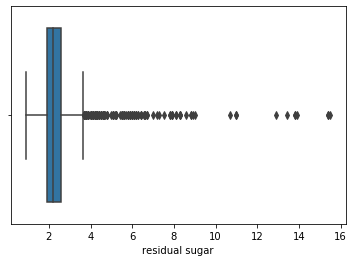

In [8]:
sns.boxplot(wine['residual sugar'])

In [9]:
wine['residual sugar']=wine.where(wine['residual sugar']<4,other=4)

In [10]:
wine.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          0.204897
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [11]:
wine['chlorides'].describe()

count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

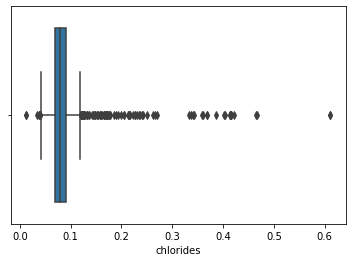

In [12]:
sns.boxplot(wine['chlorides'])

In [13]:
wine['chlorides']=wine.where(wine['chlorides']<0.12,other=0.12)

In [14]:
wine.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          0.204897
chlorides              -1.059329
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [15]:
x=wine.drop('quality',1)
y=wine['quality']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [17]:
from sklearn.preprocessing import MinMaxScaler
mi=MinMaxScaler()
x_train_sc=mi.fit_transform(x_train)
x_test_sc=mi.transform(x_test)

In [18]:
gu=GaussianNB()
br=BernoulliNB()
ml=MultinomialNB()

In [19]:
gu.fit(x_train_sc,y_train)
br.fit(x_train_sc,y_train)
ml.fit(x_train_sc,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
from sklearn.metrics import accuracy_score,classification_report

In [21]:
y_pr1=ml.predict(x_train_sc)
print(accuracy_score(y_train,y_pr1))
print(classification_report(y_train,y_pr1))

0.5290437890974083
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        36
           5       0.54      0.94      0.68       486
           6       0.50      0.31      0.39       438
           7       0.00      0.00      0.00       138
           8       0.00      0.00      0.00        12

    accuracy                           0.53      1119
   macro avg       0.17      0.21      0.18      1119
weighted avg       0.43      0.53      0.45      1119



In [22]:
y_pr2=ml.predict(x_test_sc)
print(accuracy_score(y_test,y_pr2))
print(classification_report(y_test,y_pr2))

0.48541666666666666
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.50      0.91      0.64       195
           6       0.45      0.28      0.34       200
           7       0.00      0.00      0.00        61
           8       0.00      0.00      0.00         6

    accuracy                           0.49       480
   macro avg       0.16      0.20      0.16       480
weighted avg       0.39      0.49      0.40       480



In [23]:
y_pr3=gu.predict(x_train_sc)
print(accuracy_score(y_train,y_pr3))
print(classification_report(y_train,y_pr3))

0.5853440571939231
              precision    recall  f1-score   support

           3       0.42      0.56      0.48         9
           4       0.15      0.11      0.13        36
           5       0.66      0.72      0.69       486
           6       0.58      0.50      0.53       438
           7       0.46      0.56      0.50       138
           8       0.00      0.00      0.00        12

    accuracy                           0.59      1119
   macro avg       0.38      0.41      0.39      1119
weighted avg       0.58      0.59      0.58      1119



In [24]:
y_pr4=gu.predict(x_test_sc)
print(accuracy_score(y_test,y_pr4))
print(classification_report(y_test,y_pr4))

0.5479166666666667
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.36      0.24      0.29        17
           5       0.64      0.72      0.67       195
           6       0.53      0.44      0.48       200
           7       0.40      0.51      0.45        61
           8       0.00      0.00      0.00         6

    accuracy                           0.55       480
   macro avg       0.32      0.32      0.31       480
weighted avg       0.54      0.55      0.54       480



In [25]:
y_pr5=br.predict(x_train_sc)
print(accuracy_score(y_train,y_pr5))
print(classification_report(y_train,y_pr5))
y_pr6=br.predict(x_test_sc)
print(accuracy_score(y_test,y_pr6))
print(classification_report(y_test,y_pr6))

0.4477211796246649
              precision    recall  f1-score   support

           3       1.00      0.11      0.20         9
           4       1.00      0.08      0.15        36
           5       0.44      0.96      0.60       486
           6       0.53      0.07      0.12       438
           7       1.00      0.01      0.01       138
           8       0.00      0.00      0.00        12

    accuracy                           0.45      1119
   macro avg       0.66      0.20      0.18      1119
weighted avg       0.56      0.45      0.32      1119

0.39791666666666664
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.50      0.06      0.11        17
           5       0.40      0.92      0.56       195
           6       0.33      0.04      0.08       200
           7       1.00      0.03      0.06        61
           8       0.00      0.00      0.00         6

    accuracy                          

In [26]:
wine2=pd.read_csv('winequality-red.csv',sep=';')
wine2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
wine2['residual sugar']=wine2.where(wine2['residual sugar']<4,other=4)
wine2['chlorides']=wine2.where(wine2['chlorides']<0.12,other=0.12)

In [28]:
wine2['New']=wine2['quality'].apply(lambda a:'Medium' if a==6 else ('Low' if a<=5 else 'High'))

In [29]:
set(wine2['New'])

{'High', 'Low', 'Medium'}

In [30]:
wine2['New'].value_counts()

Low       744
Medium    638
High      217
Name: New, dtype: int64

In [31]:
wine2.drop('quality',axis=1,inplace=True)

In [32]:
r=wine2.drop('New',1)
k=wine2['New']

In [33]:
r_train,r_test,k_train,k_test=train_test_split(r,k,test_size=0.3,random_state=42)
r_train_sc=mi.fit_transform(r_train)
r_test_sc=mi.transform(r_test)

In [36]:
br.fit(r_train_sc,k_train)
ml.fit(r_train_sc,k_train)
gu.fit(r_train_sc,k_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
k_pr1=br.predict(r_train_sc)
print(accuracy_score(k_train,k_pr1))
print(classification_report(k_train,k_pr1))
k_pr2=br.predict(r_test_sc)
print(accuracy_score(k_test,k_pr2))
print(classification_report(k_test,k_pr2))

0.47810545129579984
              precision    recall  f1-score   support

        High       1.00      0.01      0.01       150
         Low       0.48      1.00      0.65       531
      Medium       1.00      0.01      0.01       438

    accuracy                           0.48      1119
   macro avg       0.83      0.34      0.22      1119
weighted avg       0.75      0.48      0.31      1119

0.45208333333333334
              precision    recall  f1-score   support

        High       1.00      0.03      0.06        67
         Low       0.45      1.00      0.62       213
      Medium       1.00      0.01      0.02       200

    accuracy                           0.45       480
   macro avg       0.82      0.35      0.23       480
weighted avg       0.75      0.45      0.29       480



In [38]:
k_pr3=gu.predict(r_train_sc)
print(accuracy_score(k_train,k_pr3))
print(classification_report(k_train,k_pr3))
k_pr4=gu.predict(r_test_sc)
print(accuracy_score(k_test,k_pr4))
print(classification_report(k_test,k_pr4))

0.6371760500446828
              precision    recall  f1-score   support

        High       0.50      0.57      0.53       150
         Low       0.71      0.77      0.74       531
      Medium       0.59      0.49      0.54       438

    accuracy                           0.64      1119
   macro avg       0.60      0.61      0.60      1119
weighted avg       0.63      0.64      0.63      1119

0.5958333333333333
              precision    recall  f1-score   support

        High       0.44      0.55      0.49        67
         Low       0.69      0.76      0.72       213
      Medium       0.55      0.44      0.49       200

    accuracy                           0.60       480
   macro avg       0.56      0.58      0.57       480
weighted avg       0.59      0.60      0.59       480



In [40]:
k_pr5=ml.predict(r_train_sc)
print(accuracy_score(k_train,k_pr5))
print(classification_report(k_train,k_pr5))
k_pr6=ml.predict(r_test_sc)
print(accuracy_score(k_test,k_pr6))
print(classification_report(k_test,k_pr6))

0.49865951742627346
              precision    recall  f1-score   support

        High       0.00      0.00      0.00       150
         Low       0.51      1.00      0.68       531
      Medium       0.35      0.07      0.11       438

    accuracy                           0.50      1119
   macro avg       0.29      0.35      0.26      1119
weighted avg       0.38      0.50      0.36      1119

0.4791666666666667
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        67
         Low       0.48      0.99      0.65       213
      Medium       0.45      0.10      0.16       200

    accuracy                           0.48       480
   macro avg       0.31      0.36      0.27       480
weighted avg       0.40      0.48      0.35       480



In [46]:
from sklearn.svm import SVC
model=SVC(gamma='scale')

In [47]:
model.fit(r_train_sc,k_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
s_pred=model.predict(r_train_sc)

In [49]:
print(accuracy_score(k_train,s_pred))
print(classification_report(k_train,s_pred))

0.6988382484361036
              precision    recall  f1-score   support

        High       0.79      0.37      0.51       150
         Low       0.74      0.84      0.79       531
      Medium       0.63      0.63      0.63       438

    accuracy                           0.70      1119
   macro avg       0.72      0.62      0.64      1119
weighted avg       0.70      0.70      0.69      1119



In [50]:
s_pred1=model.predict(r_test_sc)
print(accuracy_score(k_test,s_pred1))
print(classification_report(k_test,s_pred1))

0.6104166666666667
              precision    recall  f1-score   support

        High       0.55      0.27      0.36        67
         Low       0.67      0.79      0.72       213
      Medium       0.55      0.54      0.54       200

    accuracy                           0.61       480
   macro avg       0.59      0.53      0.54       480
weighted avg       0.60      0.61      0.60       480

